Data covers ratings from Metacritic, IMDB, and Rotten Tomatoes, as well as revenue numbers, oscar counts, and runtime.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### Read and first explorations of the data

In [49]:
pixar_movies = pd.read_csv('PixarMovies.csv')

print('The dataset has ' + str(pixar_movies.shape[0]) + ' rows and ' + str(pixar_movies.shape[1]) + ' columns.')
print(pixar_movies.head(pixar_movies.shape[0]))

The dataset has 15 rows and 16 columns.
    Year Released                Movie  Length  RT Score  IMDB Score  \
0            1995            Toy Story      81       100         8.3   
1            1998         A Bug's Life      96        92         7.2   
2            1999          Toy Story 2      92       100         7.9   
3            2001       Monsters, Inc.      90        96         8.1   
4            2003         Finding Nemo     104        99         8.2   
5            2004      The Incredibles     115        97         8.0   
6            2006                 Cars     116        74         7.2   
7            2007          Ratatouille     111        96         8.0   
8            2008               WALL-E      97        96         8.4   
9            2009                   Up      96        98         8.3   
10           2010          Toy Story 3     103        99         8.4   
11           2011               Cars 2     113        39         6.3   
12           2012       

In [50]:
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

In [51]:
pixar_movies.describe()

/opt/dsserver/lib/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Production Budget,Oscars Nominated,Oscars Won
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,14.000000
mean,2006.066667,101.533333,89.333333,7.846667,82.800000,67.990667,612.486667,258.506667,318.448000,353.986667,133.400000,2.857143,0.785714
std,5.933761,9.927355,16.451950,0.655599,12.119642,23.270468,190.193934,66.518284,73.321064,135.061615,59.696614,2.032700,0.801784
min,1995.000000,81.000000,39.000000,6.300000,57.000000,29.140000,362.000000,162.800000,194.430000,170.200000,30.000000,0.000000,0.000000
25%,2002.000000,96.000000,85.000000,7.300000,75.000000,58.755000,503.150000,215.100000,261.350000,256.050000,91.000000,NaN,NaN
50%,2007.000000,102.000000,96.000000,8.000000,88.000000,66.300000,559.900000,245.900000,318.900000,336.600000,150.000000,NaN,NaN
75%,2010.500000,109.000000,98.500000,8.300000,92.000000,76.450000,704.200000,280.750000,361.165000,427.800000,182.500000,NaN,NaN
max,2015.000000,116.000000,100.000000,8.800000,96.000000,110.310000,1063.200000,415.000000,457.460000,648.200000,200.000000,6.000000,2.000000


### Cleaning up the data
Re-indexing, normalizing ratings numbers, removing null values for Inside Out (recent release, no award or complete revenue data available yet), changing types to integers. 



In [52]:
pixar_movies['IMDB Score'] = pixar_movies['IMDB Score'] * 10
pixar_movies[['Domestic %', 'International %']] = pixar_movies[['Domestic %', 'International %']].apply(lambda x: x.str.rstrip('%')).astype('float')
filtered_pixar = pixar_movies.dropna()
filtered_pixar.set_index('Movie', inplace=True)
pixar_movies.set_index('Movie', inplace=True)
filtered_pixar.head()

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
Movie,,,,,,,,,,,,,,,
Toy Story,1995,81,100,83.0,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3.0,0.0
A Bug's Life,1998,96,92,72.0,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1.0,0.0
Toy Story 2,1999,92,100,79.0,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1.0,0.0
"Monsters, Inc.",2001,90,96,81.0,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3.0,1.0
Finding Nemo,2003,104,99,82.0,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4.0,1.0


### Visualizing the cleaned data

Starting off by review ratings across the three review sites.

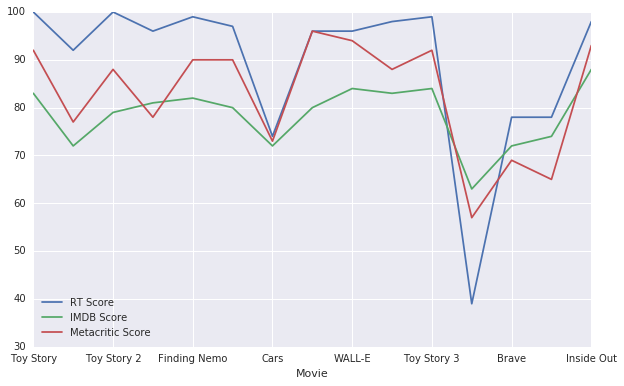

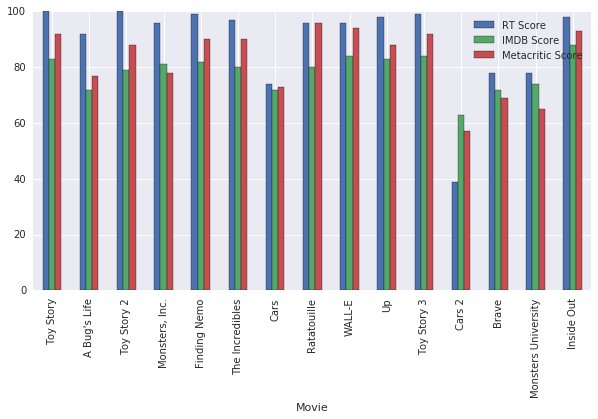

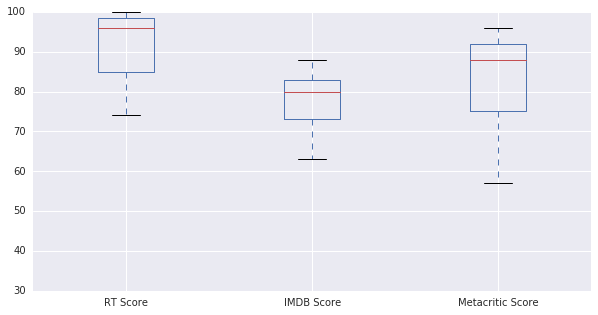

In [68]:
review_cols = ['RT Score', 'IMDB Score', 'Metacritic Score']
critics_reviews = pixar_movies[review_cols]
critics_reviews.plot(figsize = (10,6))
plt.show()
critics_reviews.plot(kind='bar', figsize = (10,5))
critics_reviews.plot(kind='box', figsize = (10,5))

Rotten tomatoes returns consistently higher scores, a notable exception being the lowest rated film, Cars 2. RT delivers the lowest rating of any movie from any site. It appears that the reviews all lie within 20 points of each other.

#### Follow up
Is this range significant? Potentially look into the places that each site aggregates reviews from.

Splitting this into user vs critic reviews could lead to interesting discoveries about the user base for each site.